# Import Required Libraries
Import the necessary libraries, including NumPy, nltk, and Gensim.

In [27]:
# Import Required Libraries

import numpy as np
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# Download the Brown corpus if not already downloaded
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Huy\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

# Load and Preprocess the Corpus
Load a real-world text corpus and preprocess it by removing stop words, punctuation, and performing other text cleaning steps.

In [28]:
# Load and Preprocess the Corpus
import string
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load the Brown corpus
corpus = brown.sents()

# Preprocess the corpus
stop_words = set(stopwords.words('english'))
processed_corpus = []

for sentence in corpus:
    # Convert to lower case
    sentence = [word.lower() for word in sentence]
    # Remove punctuation
    sentence = [word.translate(str.maketrans('', '', string.punctuation)) for word in sentence]
    # Remove stop words
    sentence = [word for word in sentence if word not in stop_words]
    # Remove empty strings
    sentence = [word for word in sentence if word]
    processed_corpus.append(sentence)

# Display the first 5 processed sentences
processed_corpus[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Huy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'investigation',
  'atlantas',
  'recent',
  'primary',
  'election',
  'produced',
  'evidence',
  'irregularities',
  'took',
  'place'],
 ['jury',
  'said',
  'termend',
  'presentments',
  'city',
  'executive',
  'committee',
  'overall',
  'charge',
  'election',
  'deserves',
  'praise',
  'thanks',
  'city',
  'atlanta',
  'manner',
  'election',
  'conducted'],
 ['septemberoctober',
  'term',
  'jury',
  'charged',
  'fulton',
  'superior',
  'court',
  'judge',
  'durwood',
  'pye',
  'investigate',
  'reports',
  'possible',
  'irregularities',
  'hardfought',
  'primary',
  'mayornominate',
  'ivan',
  'allen',
  'jr'],
 ['relative',
  'handful',
  'reports',
  'received',
  'jury',
  'said',
  'considering',
  'widespread',
  'interest',
  'election',
  'number',
  'voters',
  'size',
  'city'],
 ['jury',
  'said',
  'find',
  'many',
  'georgias',
  'registration',
  'election',
  'laws',
  'outmoded',
 

# Build Co-occurrence Matrix
Build a co-occurrence matrix from the preprocessed text corpus.

In [29]:
# Build Co-occurrence Matrix with Window Size = 2
from collections import defaultdict
from scipy.sparse import lil_matrix

def build_cooccurrence_matrix(corpus, window_size=2):  # Set window size = 2
    vocab = set([word for sentence in corpus for word in sentence])
    vocab = {word: idx for idx, word in enumerate(vocab)}
    vocab_size = len(vocab)
    cooccurrence_matrix = lil_matrix((vocab_size, vocab_size), dtype=np.float64)

    for sentence in corpus:
        for i, word in enumerate(sentence):
            word_idx = vocab[word]
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)
            for j in range(start, end):
                if i != j:
                    context_word = sentence[j]
                    context_word_idx = vocab[context_word]
                    cooccurrence_matrix[word_idx, context_word_idx] += 1

    return cooccurrence_matrix, vocab

cooccurrence_matrix, vocab = build_cooccurrence_matrix(processed_corpus, window_size=2)
cooccurrence_matrix[:5, :5].toarray()  # Display the first 5x5 part of the co-occurrence matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

# Train the GloVe Model with Gensim
Use Gensim's GloVe implementation to train the model on the co-occurrence matrix.

In [30]:
# Load Pre-trained GloVe with Gensim and Save
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Path to the GloVe file
glove_file = r"C:\Users\Huy\Downloads\labbt\glove.6B\glove.6B.100d.txt"

# Convert the GloVe format file to Word2Vec format
word2vec_output_file = 'glove_word2vec.txt'
glove2word2vec(glove_file, word2vec_output_file)

# Load the converted file into a Gensim KeyedVectors model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Save the model
glove_model.save("glove_gensim.kv")
print("Model saved as 'glove_gensim.kv'")

# Check the first few words in the model
print(glove_model.most_similar('king'))

C:\Users\Huy\AppData\Local\Temp\ipykernel_24396\2133431377.py:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_output_file)


Model saved as 'glove_gensim.kv'
[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


# Evaluate the Model
Evaluate the trained GloVe model by finding similar words and visualizing word embeddings.

Words similar to 'government':
administration: 0.7936998605728149
governments: 0.7700926661491394
officials: 0.7590482234954834
authorities: 0.7441839575767517
opposition: 0.7371706962585449
saying: 0.7335515022277832
official: 0.732407808303833
country: 0.7319549322128296
promised: 0.7295145988464355
military: 0.7288950681686401


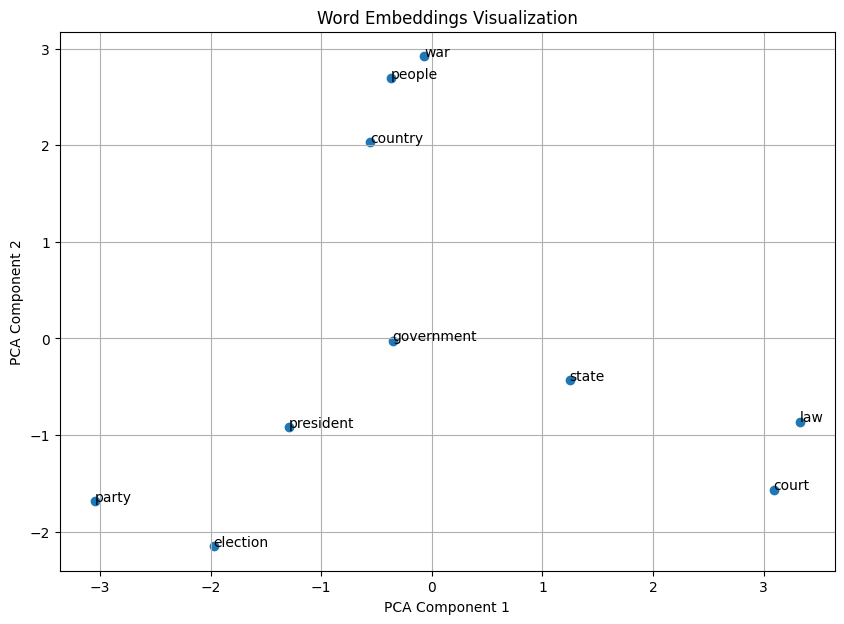

In [31]:
# Evaluate the Model
# Find similar words
def find_similar_words(word, model, topn=10):
    if word not in model:
        return []
    similar_words = model.most_similar(word, topn=topn)
    return similar_words

# Find words similar to 'government'
similar_words = find_similar_words('government', glove_model)
print("Words similar to 'government':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

# Visualize word embeddings using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of words for visualization
words = ['government', 'country', 'president', 'people', 'state', 'war', 'law', 'court', 'party', 'election']
word_vectors = [glove_model[word] for word in words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Plot the word embeddings
plt.figure(figsize=(10, 7))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title('Word Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()